In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
credit = pd.read_csv('F:\\Downloads\\dseb-63-data-preparation-final-project\\dseb63_final_project_DP_dataset\\dseb63_credit_card_balance.csv')

In [3]:
credit

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,2582071,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.0,2250.0,...,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0,87788
1,2582071,-82,16809.210,67500,0.0,0.0,0.0,0.0,3375.0,9000.0,...,16809.210,0.0,0,0.0,0.0,18.0,Active,0,0,87788
2,2582071,-84,27577.890,67500,0.0,0.0,0.0,0.0,3375.0,4500.0,...,27577.890,0.0,0,0.0,0.0,16.0,Active,0,0,87788
3,2582071,-7,65159.235,45000,0.0,0.0,0.0,0.0,2250.0,2250.0,...,65609.235,0.0,0,0.0,0.0,63.0,Active,0,0,87788
4,2582071,-59,70475.850,67500,24750.0,24750.0,0.0,0.0,3375.0,4500.0,...,70475.850,4.0,4,0.0,0.0,41.0,Active,0,0,87788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227960,1551072,-1,0.000,202500,NaN,0.0,NaN,NaN,0.0,NaN,...,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,259579
3227961,2339982,-1,0.000,45000,0.0,0.0,0.0,0.0,0.0,NaN,...,0.000,0.0,0,0.0,0.0,0.0,Active,0,0,220697
3227962,2720102,-1,0.000,225000,NaN,0.0,NaN,NaN,0.0,NaN,...,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,93573
3227963,1897864,-2,0.000,270000,NaN,0.0,NaN,NaN,0.0,NaN,...,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,11072


In [4]:
print(credit.head())

   SK_ID_PREV  MONTHS_BALANCE  AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  \
0     2582071              -1    63975.555                    45000   
1     2582071             -82    16809.210                    67500   
2     2582071             -84    27577.890                    67500   
3     2582071              -7    65159.235                    45000   
4     2582071             -59    70475.850                    67500   

   AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
0                    2250.0                2250.0                         0.0   
1                       0.0                   0.0                         0.0   
2                       0.0                   0.0                         0.0   
3                       0.0                   0.0                         0.0   
4                   24750.0               24750.0                         0.0   

   AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  \
0        

## Null Values Check

In [5]:
check_null = credit.isna().sum().sort_values(ascending=False)
percentage = ((credit.isnull().sum()/len(credit)*100)).sort_values(ascending=False)
null_cols = pd.concat([check_null, percentage], axis=1, keys=['Count','Percentage'])
print('Distributions of Missing values:')
null_cols.head(20)

Distributions of Missing values:


,Count,Percentage
AMT_PAYMENT_CURRENT,620093,19.210029
CNT_DRAWINGS_ATM_CURRENT,605754,18.765817
AMT_DRAWINGS_ATM_CURRENT,605754,18.765817
AMT_DRAWINGS_OTHER_CURRENT,605754,18.765817
AMT_DRAWINGS_POS_CURRENT,605754,18.765817
CNT_DRAWINGS_POS_CURRENT,605754,18.765817
CNT_DRAWINGS_OTHER_CURRENT,605754,18.765817
AMT_INST_MIN_REGULARITY,264384,8.190423
CNT_INSTALMENT_MATURE_CUM,264384,8.190423
SK_ID_PREV,0,0.000000


## Null Percentage > 90% Check

In [6]:
print('Columns that contain more than 90% missing values:')
more90_cols = credit.loc[:,(credit.isnull().sum(axis = 0) / credit.shape[0]) >= 0.9].columns
more90_cols


Columns that contain more than 90% missing values:


Index([], dtype='object')

NO COLUMNS HAVE NULL VALUES > 90% -> SO WE'RE KEEPING THE DATASET AS IT IS FOR NOW

## Duplicates Check

In [7]:
credit.duplicated().sum()

0

# Outliers Check

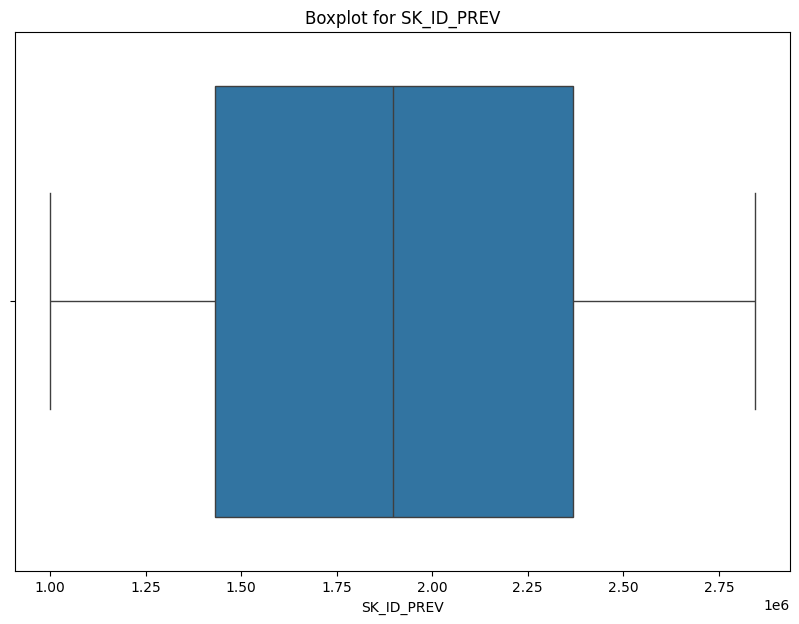

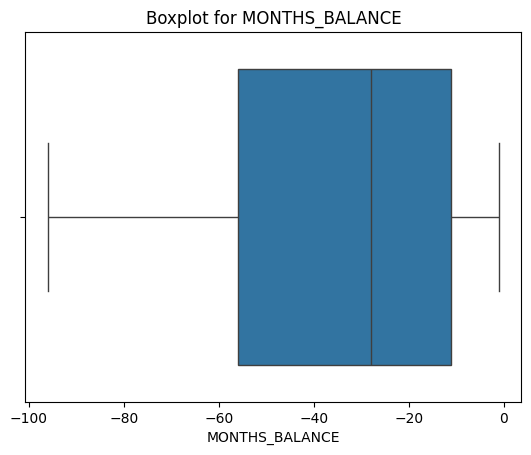

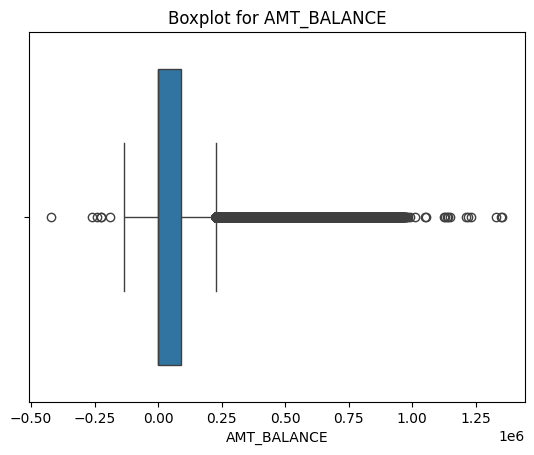

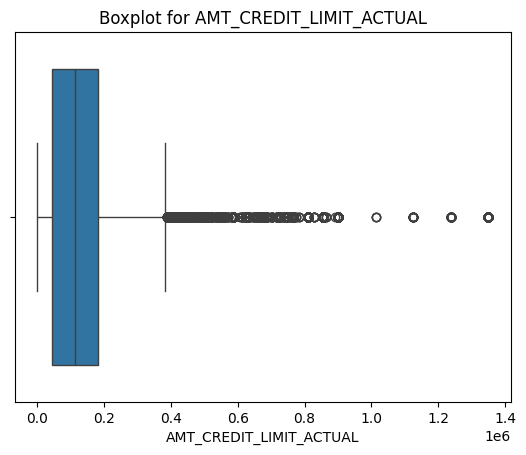

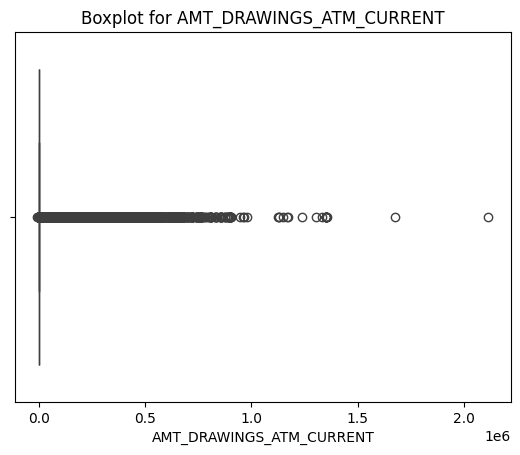

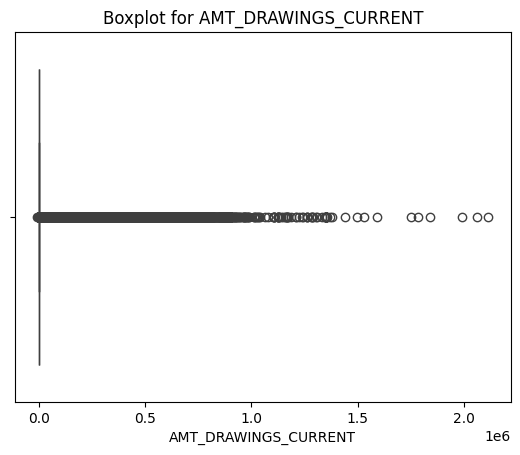

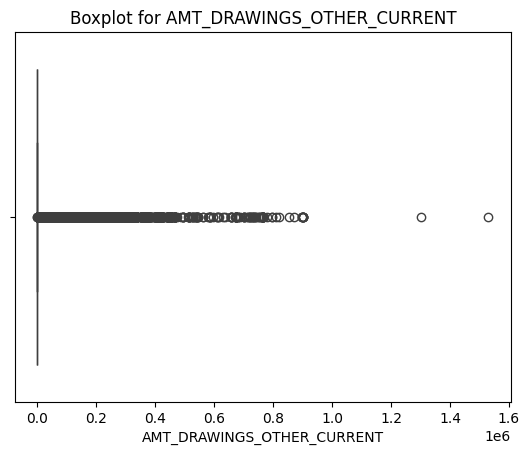

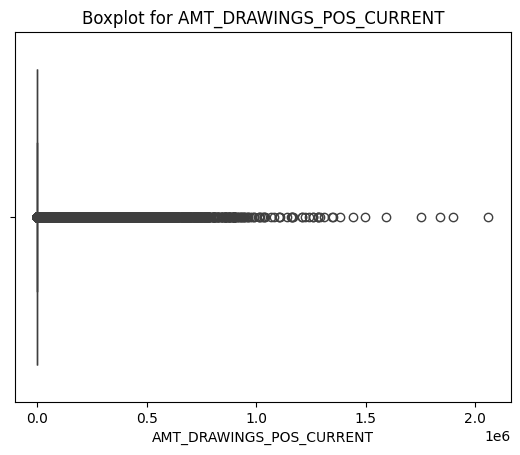

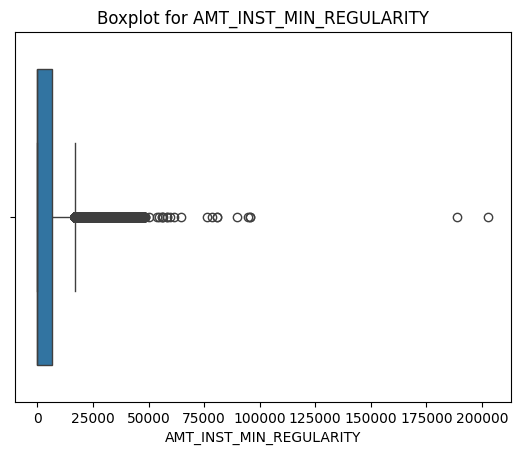

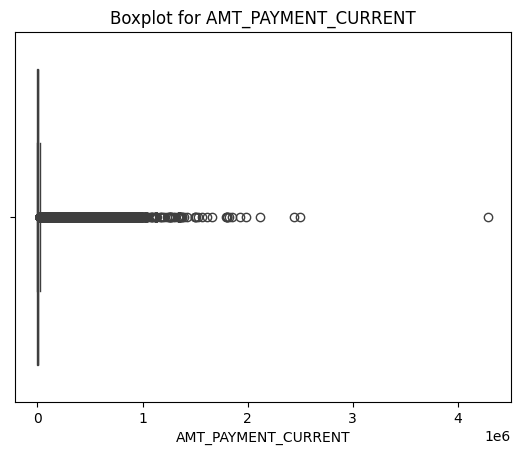

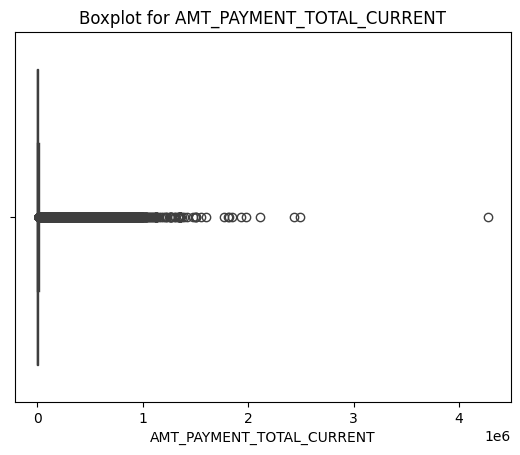

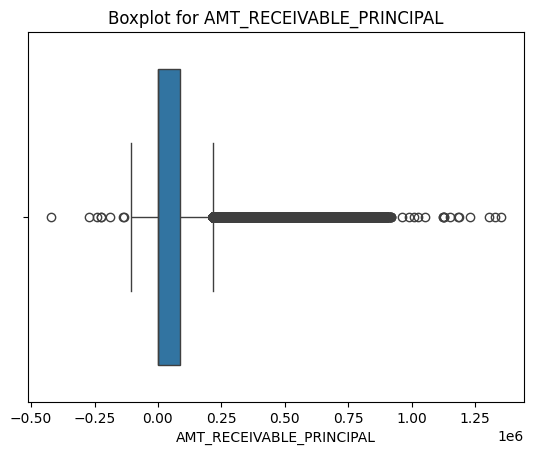

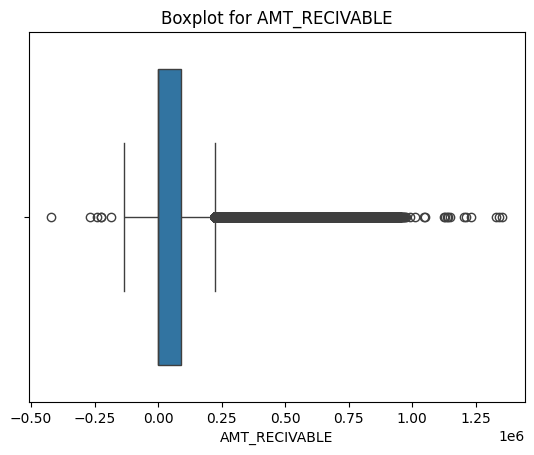

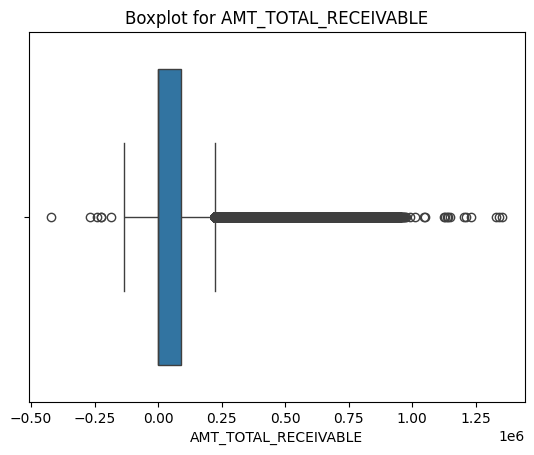

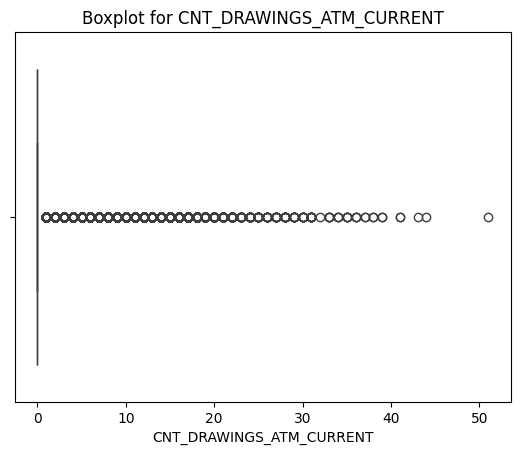

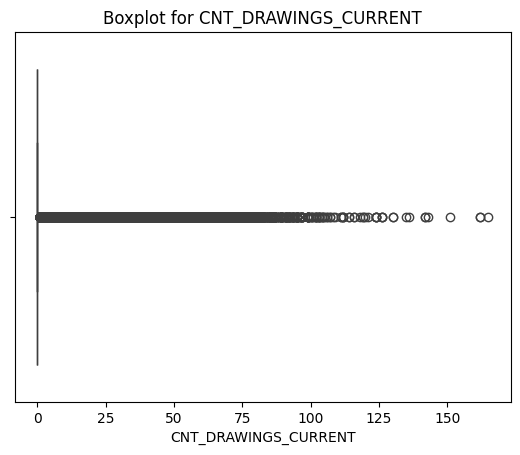

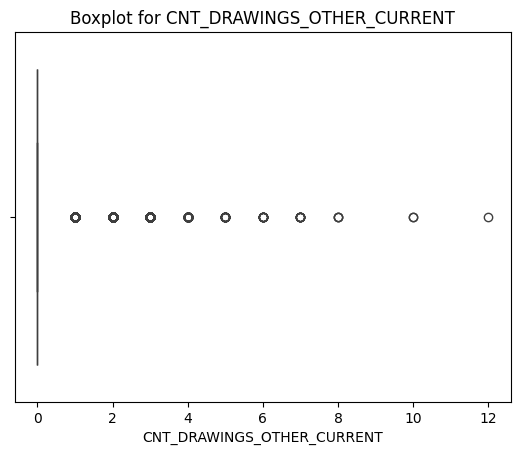

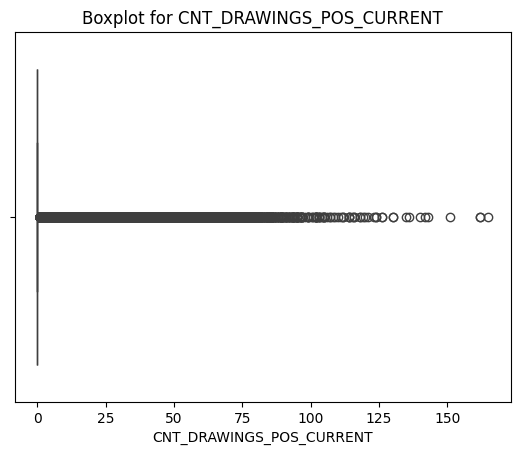

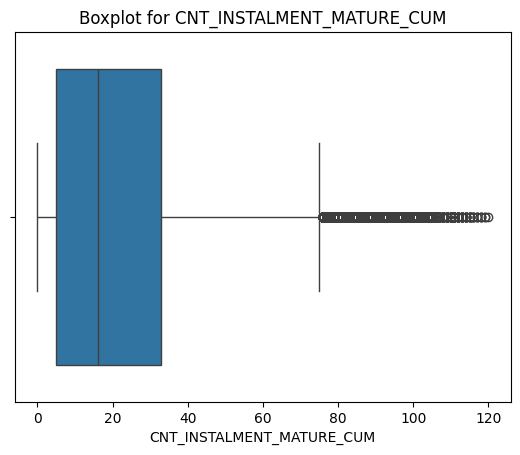

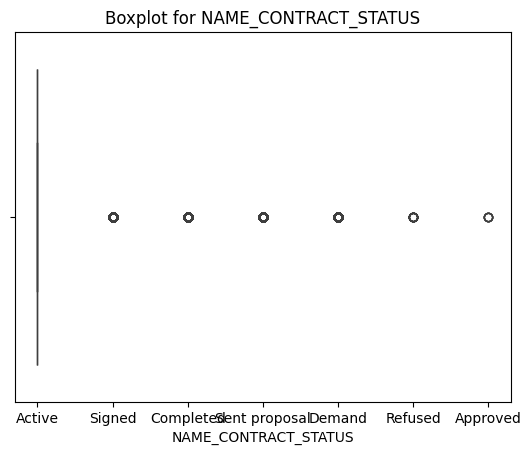

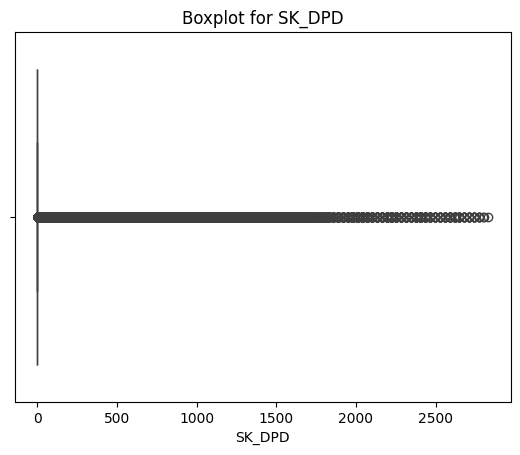

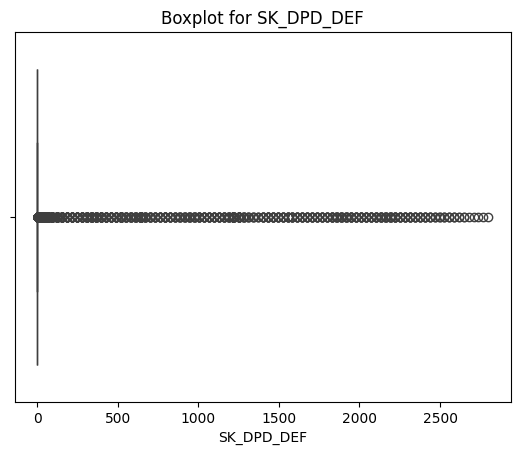

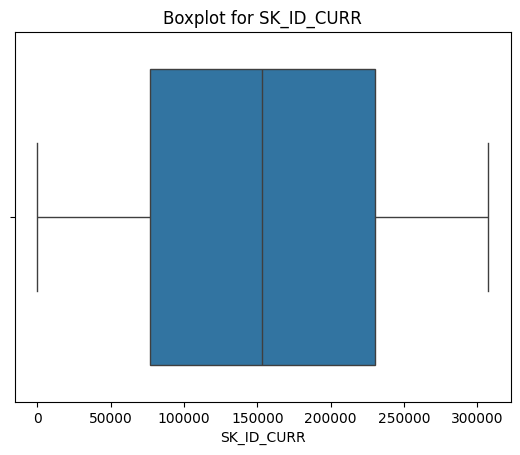

In [8]:
plt.figure(figsize=(10, 7))

for column in credit.columns:
    sns.boxplot(x=credit[column])

    plt.title(f'Boxplot for {column}')

    plt.show()

## Data Exploration

In [7]:
num_data = credit._get_numeric_data()
cate_data = credit.drop(columns=num_data.columns)

In [8]:
cate_data = credit.drop(columns=num_data.columns)

### Numerical Data

In [11]:
for i in num_data.columns:
    great0 = credit[i][credit[i] > 0].count()
    equal0 =  credit[i][credit[i] == 0].count()
    small0 = credit[i][credit[i] < 0].count()
    nan_total = credit[i].isnull().sum()
    other_value = credit.shape[0] - great0 - small0 - nan_total - equal0
    print(f'{i}  has  {great0} values greater than 0,  {equal0} values equal to 0,  {small0} values less than 0,  NaN: {nan_total},  other values: {other_value}')


SK_ID_PREV  has  3227965 values greater than 0,  0 values equal to 0,  0 values less than 0,  NaN: 0,  other values: 0
MONTHS_BALANCE  has  0 values greater than 0,  0 values equal to 0,  3227965 values less than 0,  NaN: 0,  other values: 0
AMT_BALANCE  has  1440575 values greater than 0,  1785423 values equal to 0,  1967 values less than 0,  NaN: 0,  other values: 0
AMT_CREDIT_LIMIT_ACTUAL  has  2598403 values greater than 0,  629562 values equal to 0,  0 values less than 0,  NaN: 0,  other values: 0
AMT_DRAWINGS_ATM_CURRENT  has  365140 values greater than 0,  2257070 values equal to 0,  1 values less than 0,  NaN: 605754,  other values: 0
AMT_DRAWINGS_CURRENT  has  522034 values greater than 0,  2705929 values equal to 0,  2 values less than 0,  NaN: 0,  other values: 0
AMT_DRAWINGS_OTHER_CURRENT  has  10847 values greater than 0,  2611364 values equal to 0,  0 values less than 0,  NaN: 605754,  other values: 0
AMT_DRAWINGS_POS_CURRENT  has  218149 values greater than 0,  2404062 v

### Categorical Data

In [12]:
for i in cate_data.columns[:8]:
    print(f'col {i} : {list(cate_data[i].unique())}\n')

col NAME_CONTRACT_STATUS : ['Active', 'Signed', 'Completed', 'Sent proposal', 'Demand', 'Refused', 'Approved']



In [13]:
for i in cate_data.columns[8:]:
    print(f'col {i} : {list(cate_data[i].unique())}\n')

# EDA Internal

## Univariate Analysis

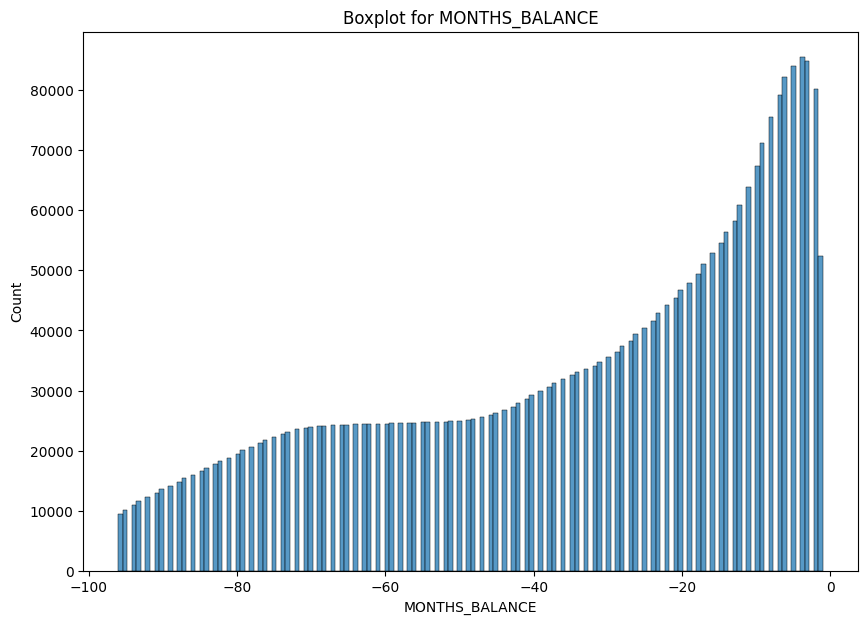

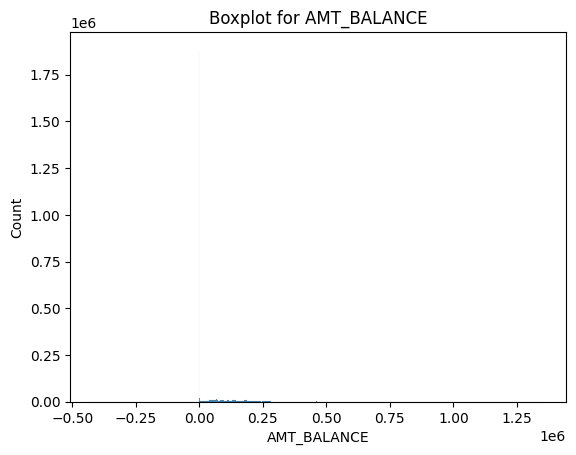

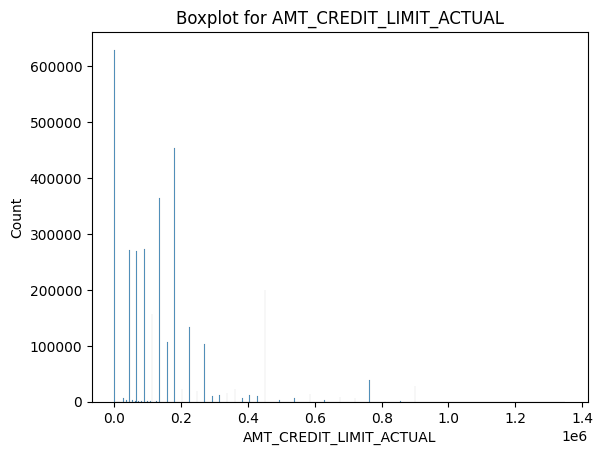

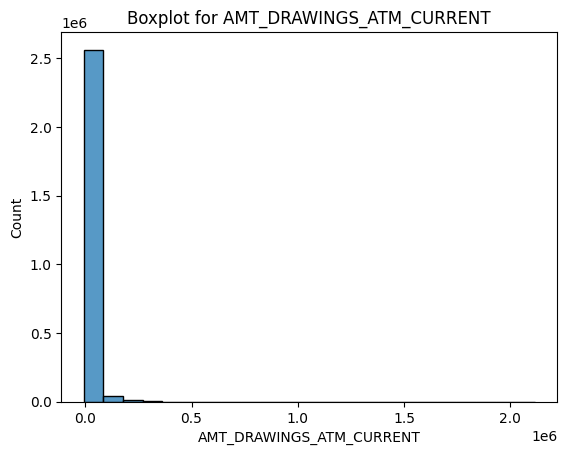

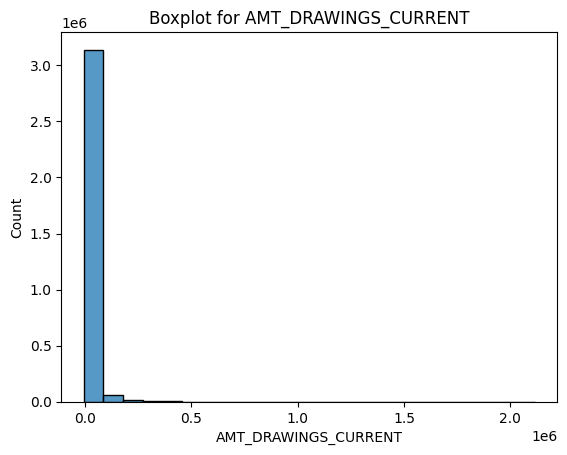

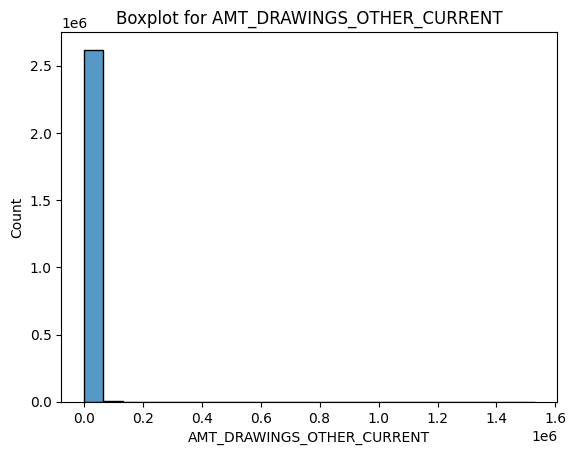

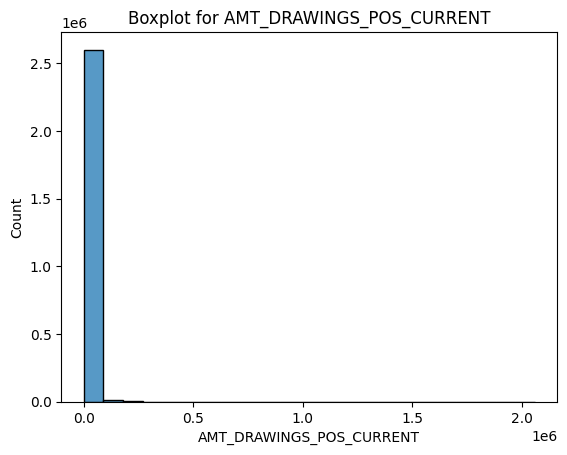

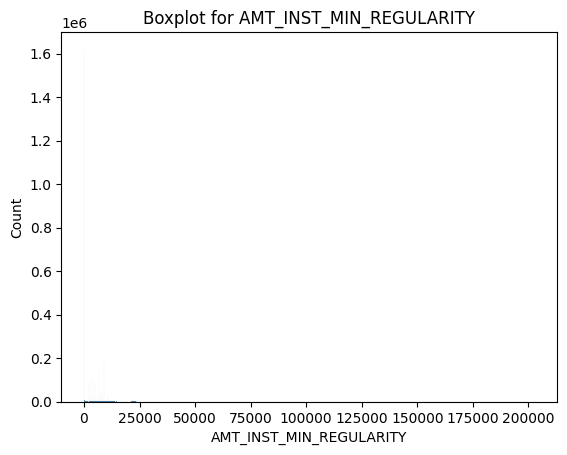

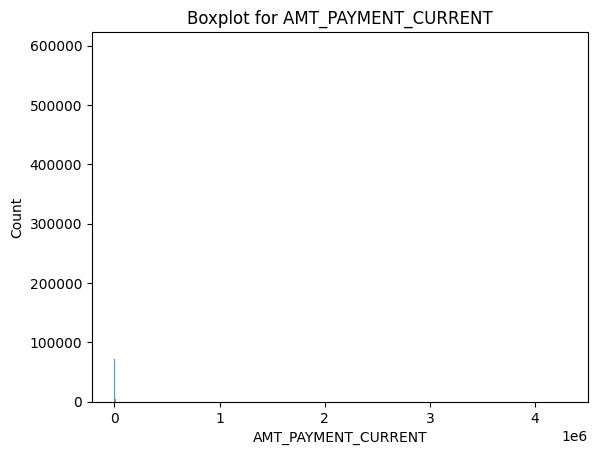

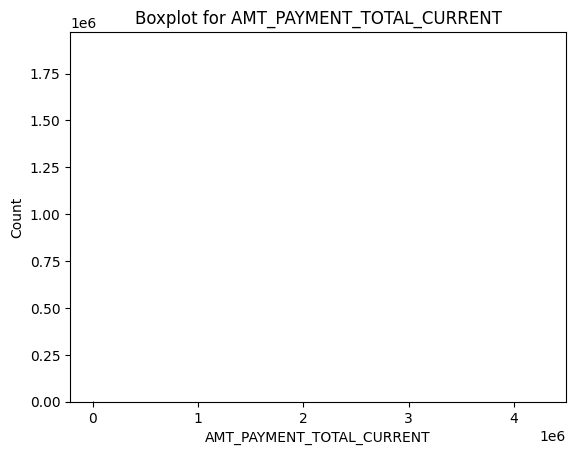

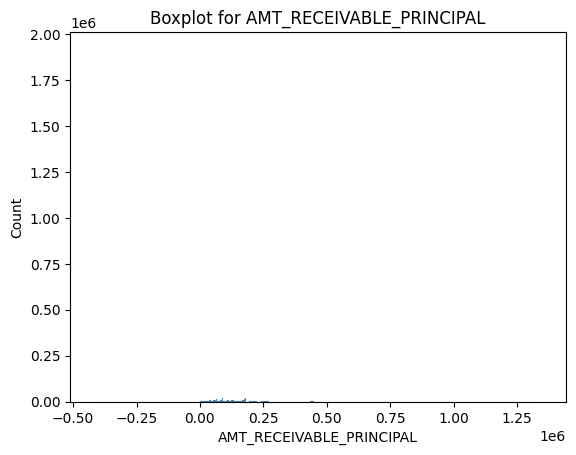

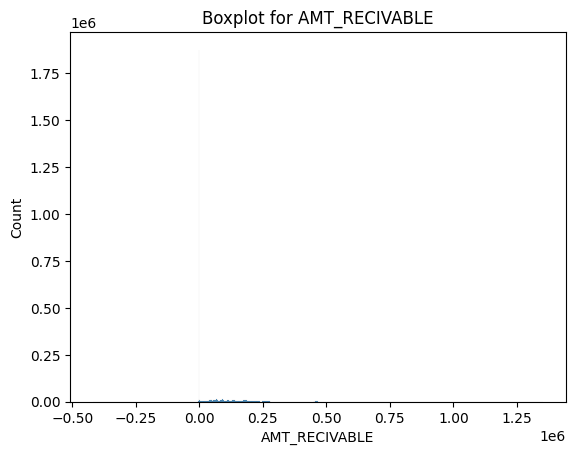

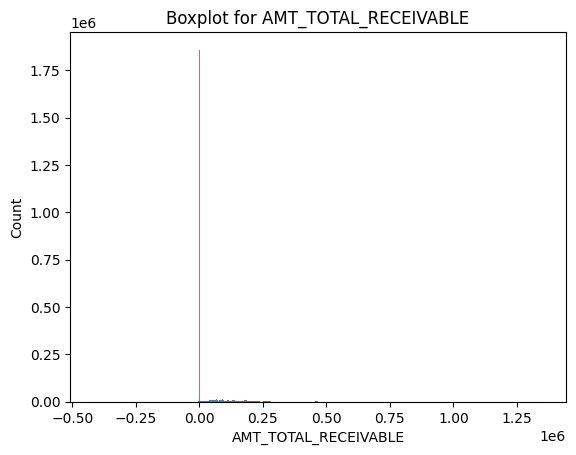

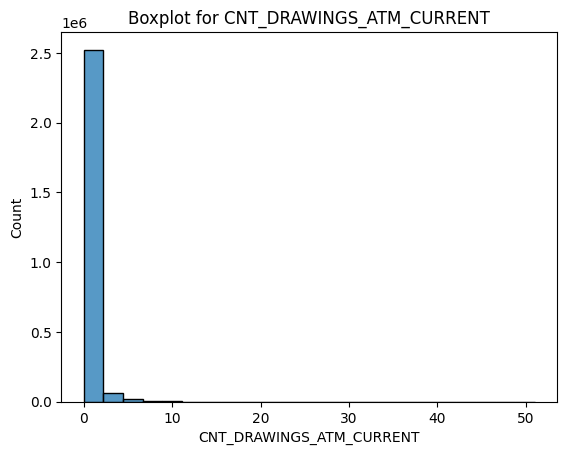

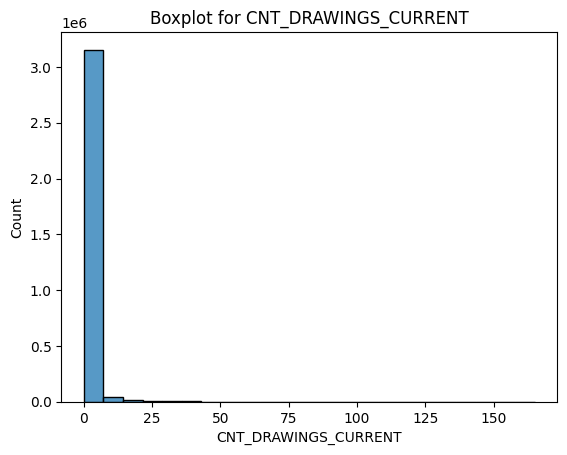

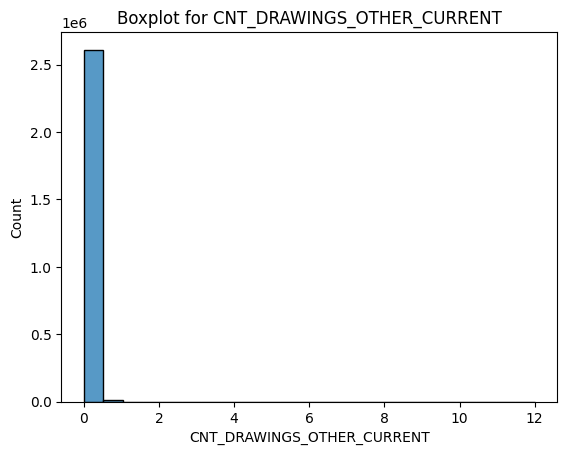

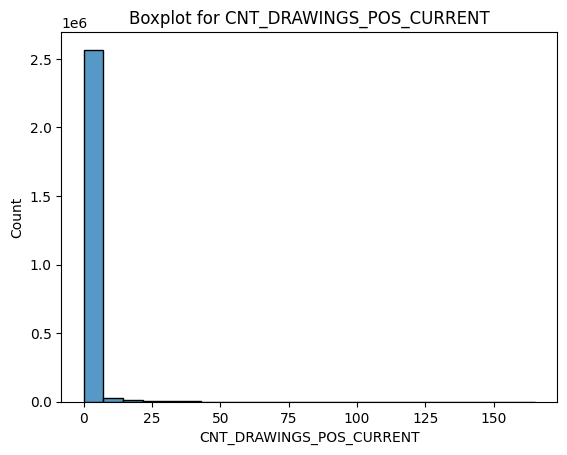

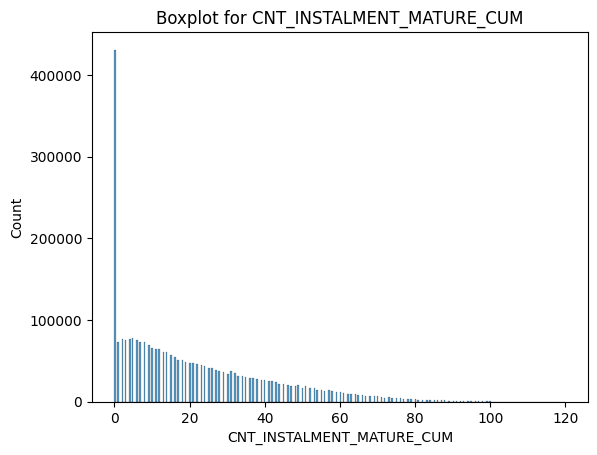

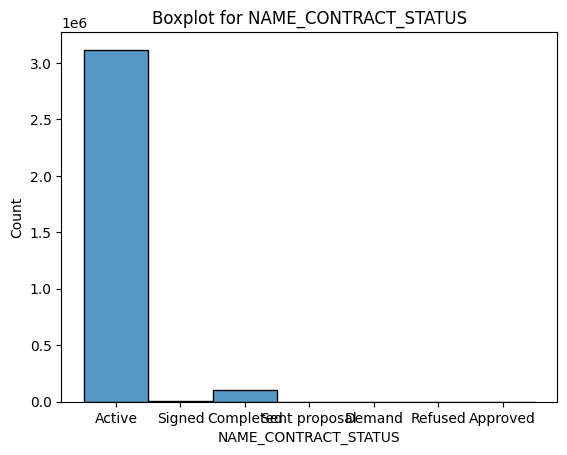

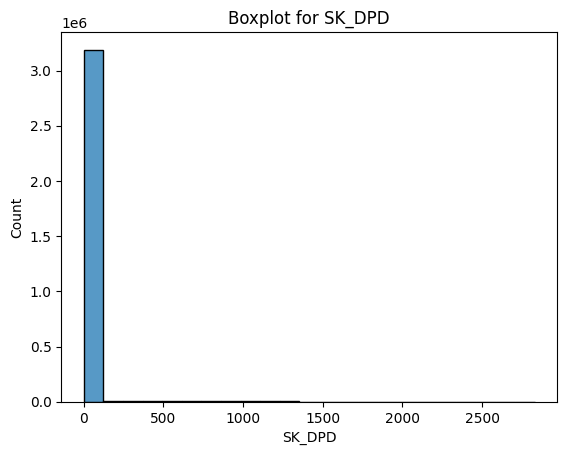

In [18]:
plt.figure(figsize=(10, 7))

for column in credit.iloc[:,1:21]:
    sns.histplot(x=credit[column])

    plt.title(f'Boxplot for {column}')

    plt.show()

## Bivariate Analysis

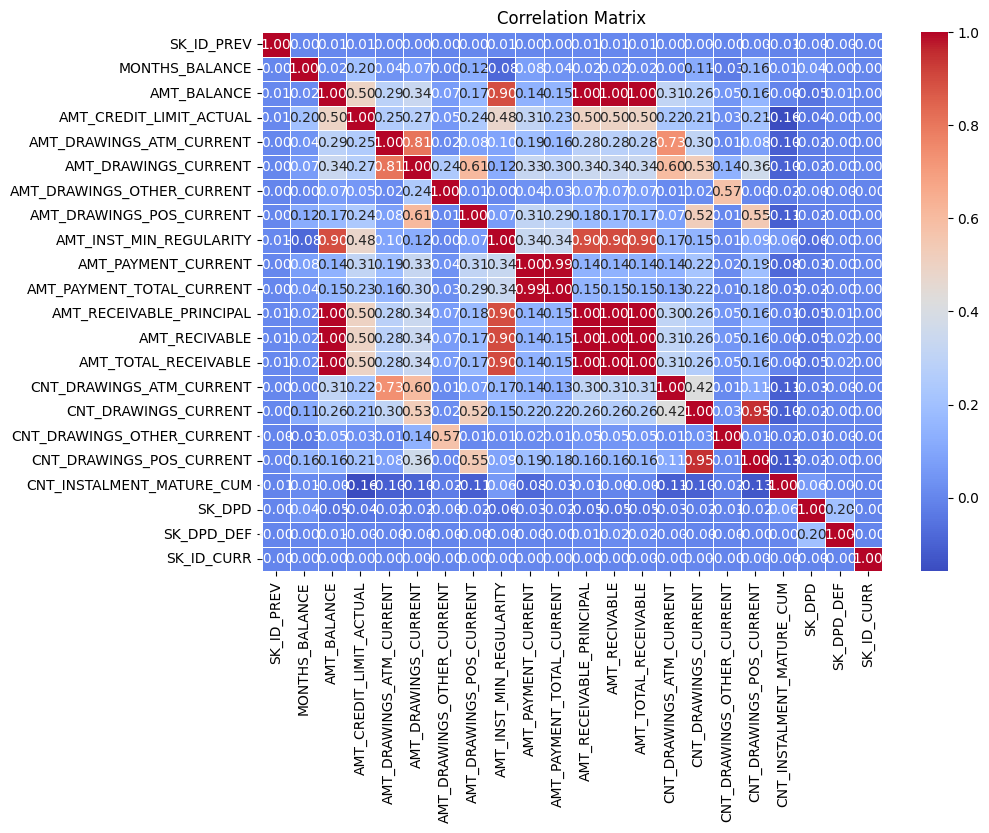

In [15]:
correlation_matrix = credit.corr(method="pearson",numeric_only=True)
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Feature couples that has high correlation: 
* AMT_BALANCE - AMT_RECEIVABLE_PRINCIPAL (1.00)
* AMT_BALANCE - AMT_RECIVABLE (1.00)
* AMT_BALANCE - AMT_TOTAL_RECEIVABLE (1.00)
* AMT_PAYMENT_CURRENT - AMT_PAYMENT_TOTAL_CURRENT (0.99)
* CNT_DRAWINGS_CURRENT - CNT_DRAWINGS_POS_CURRENT (0.95)
* AMT_INST_MIN_REGULARITY - AMT_BALANCE (0.90)
* AMT_INST_MIN_REGULARITY - AMT_RECEIVABLE_PRINCIPAL (0.90)
* AMT_INST_MIN_REGULARITY - AMT_RECIVABLE (0.90)
* AMT_INST_MIN_REGULARITY - AMT_TOTAL_RECEIVABLE (0.90)

# EDA External

In [4]:
app_train = pd.read_csv('F:\\Downloads\\dseb-63-data-preparation-final-project\\dseb63_final_project_DP_dataset\\dseb63_application_train.csv')
app_train = app_train[['SK_ID_CURR','TARGET']]

In [5]:
merge_table = pd.merge(credit,app_train,on='SK_ID_CURR',how='left')
merge_table.head()

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR,TARGET
0,2582071,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.0,2250.0,...,1.0,1,0.0,0.0,69.0,Active,0,0,87788,1.0
1,2582071,-82,16809.210,67500,0.0,0.0,0.0,0.0,3375.0,9000.0,...,0.0,0,0.0,0.0,18.0,Active,0,0,87788,1.0
2,2582071,-84,27577.890,67500,0.0,0.0,0.0,0.0,3375.0,4500.0,...,0.0,0,0.0,0.0,16.0,Active,0,0,87788,1.0
3,2582071,-7,65159.235,45000,0.0,0.0,0.0,0.0,2250.0,2250.0,...,0.0,0,0.0,0.0,63.0,Active,0,0,87788,1.0
4,2582071,-59,70475.850,67500,24750.0,24750.0,0.0,0.0,3375.0,4500.0,...,4.0,4,0.0,0.0,41.0,Active,0,0,87788,1.0


In [9]:
num_data.columns

Index(['SK_ID_PREV', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF', 'SK_ID_CURR'],
      dtype='object')

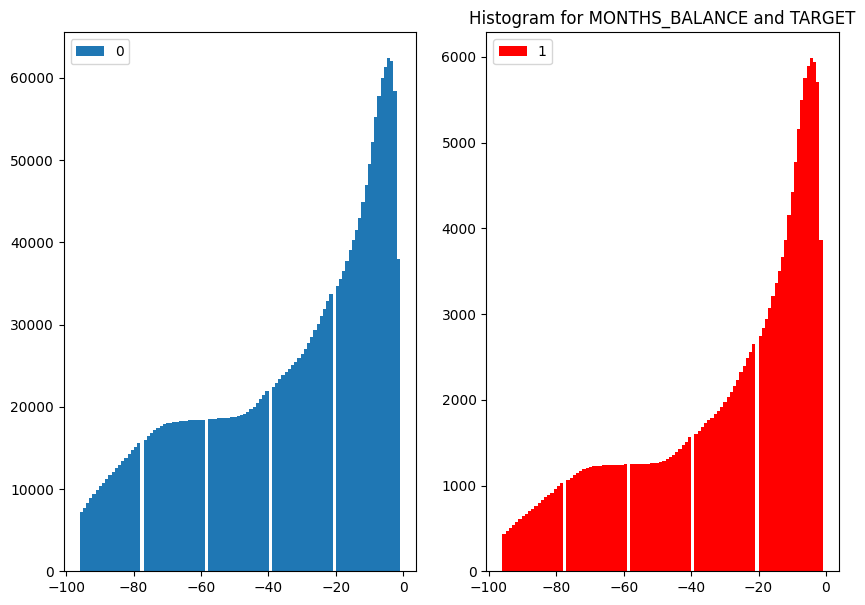

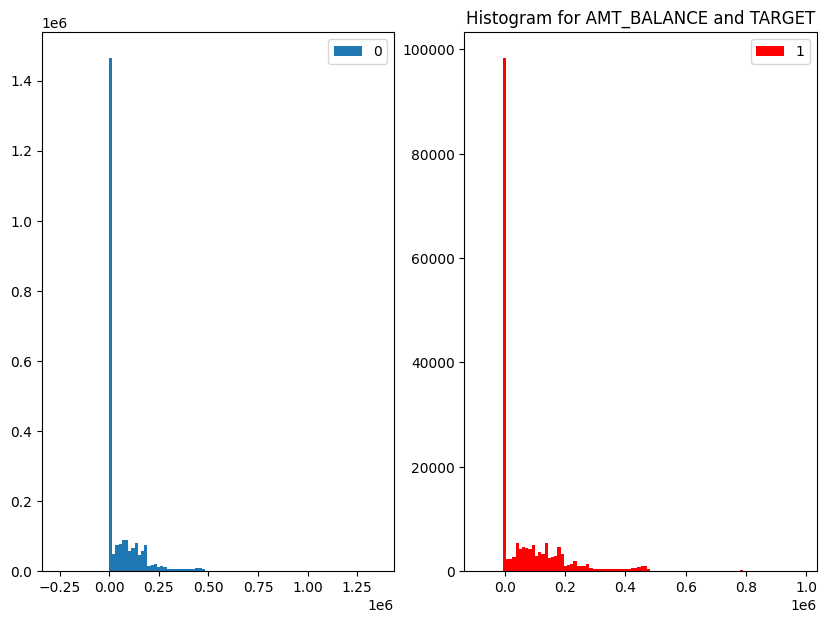

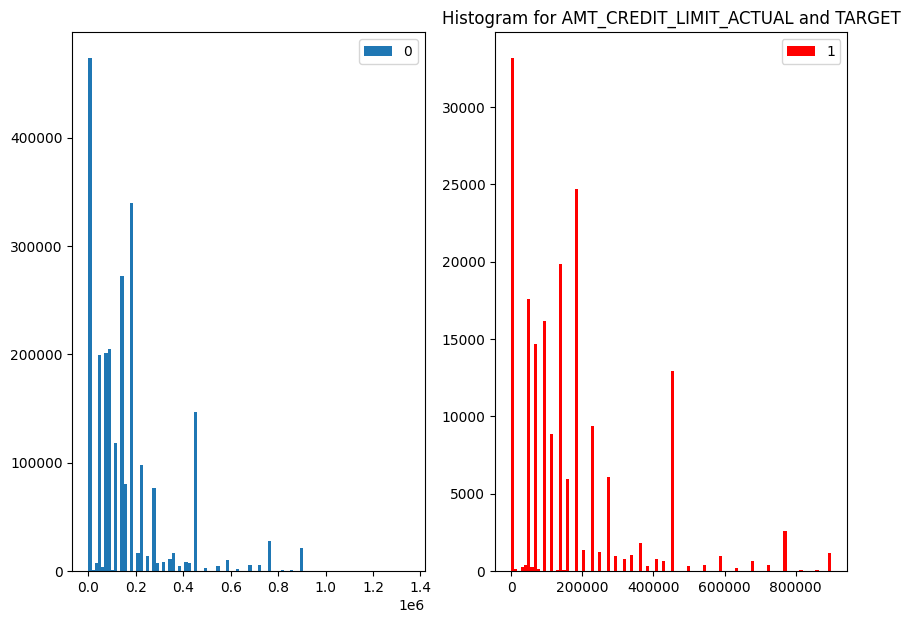

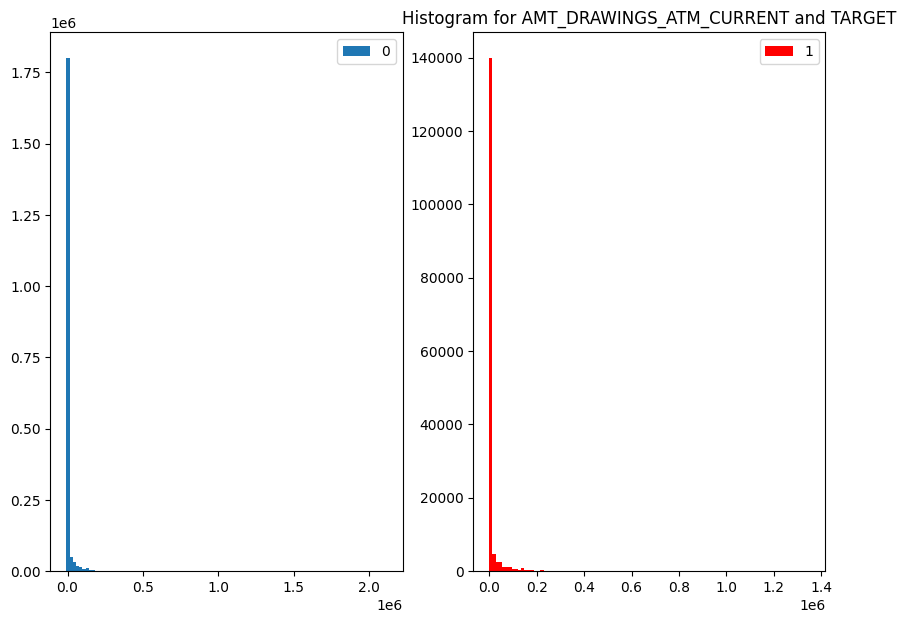

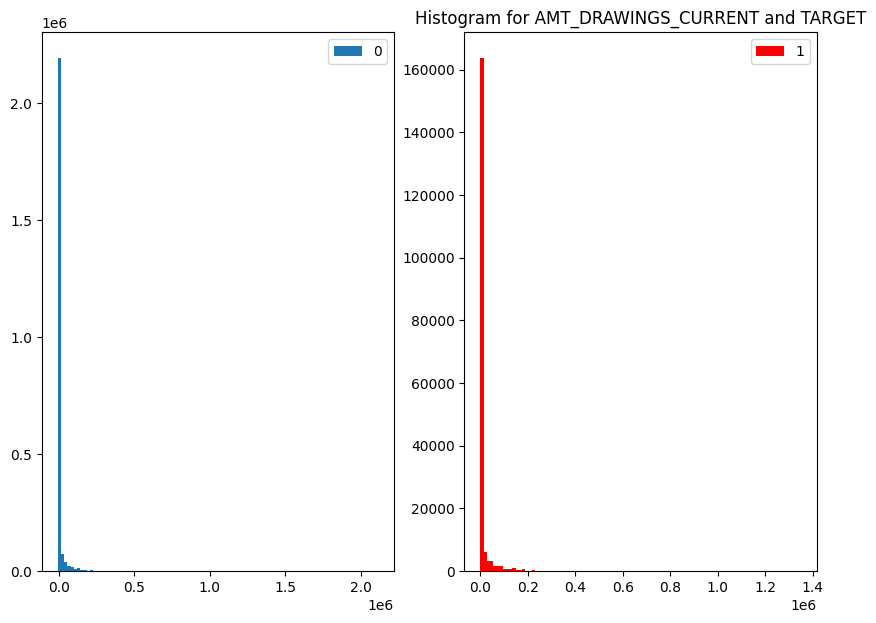

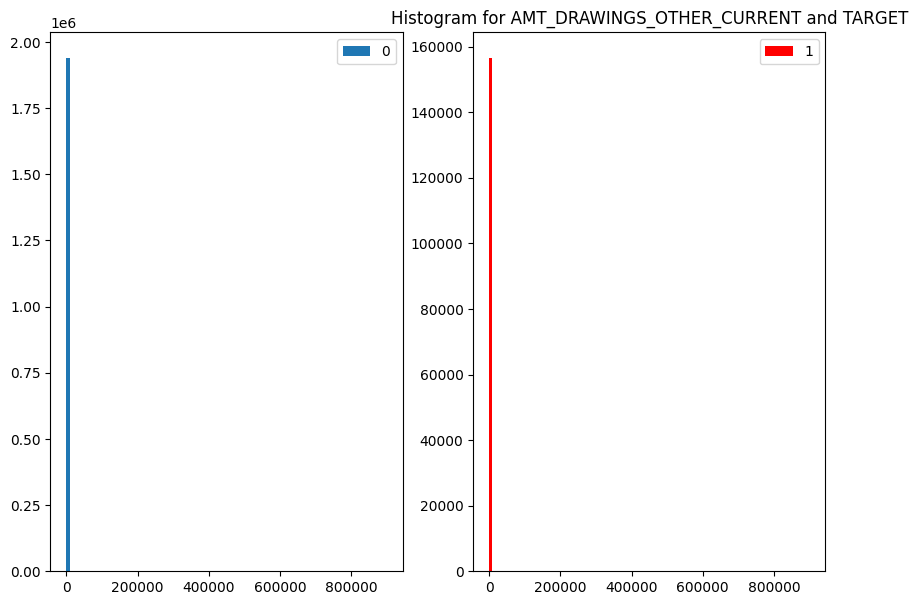

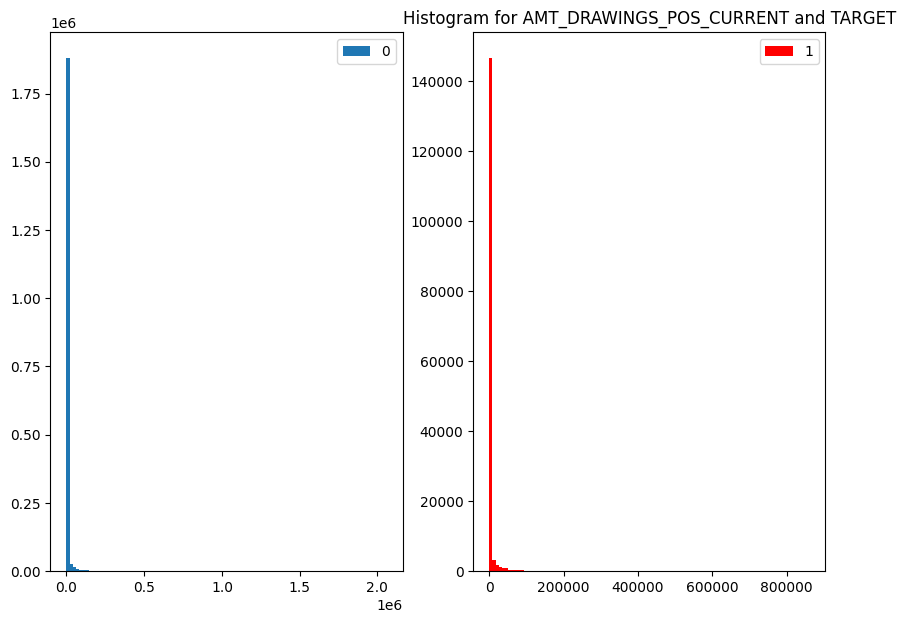

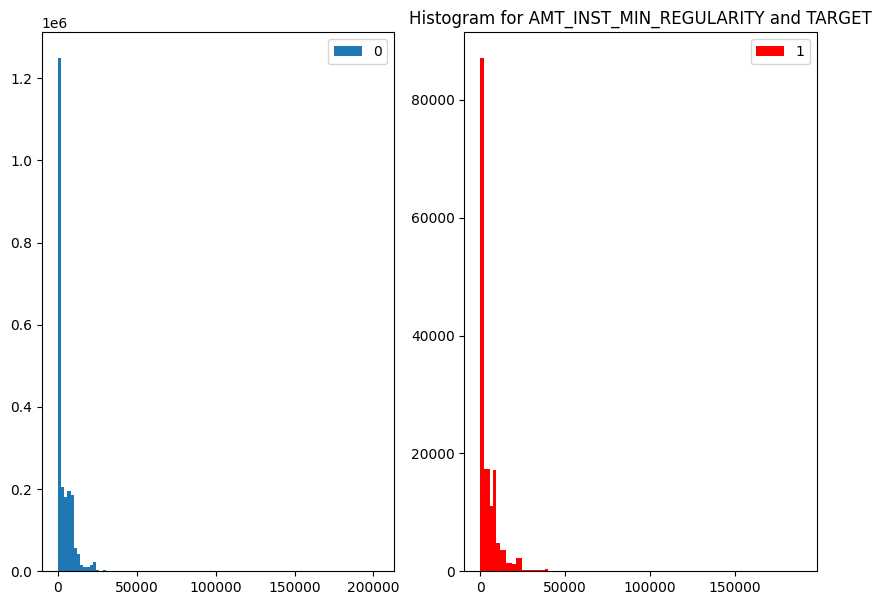

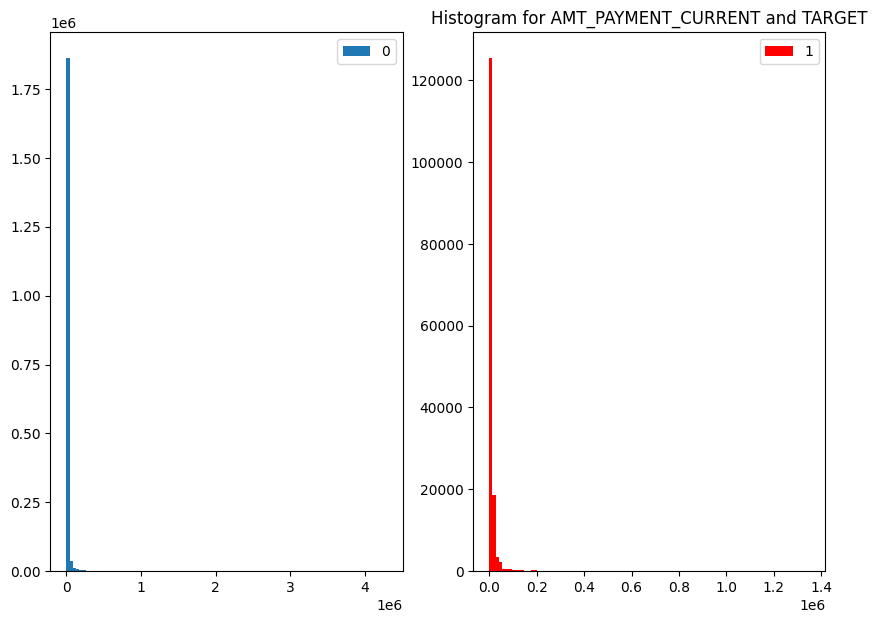

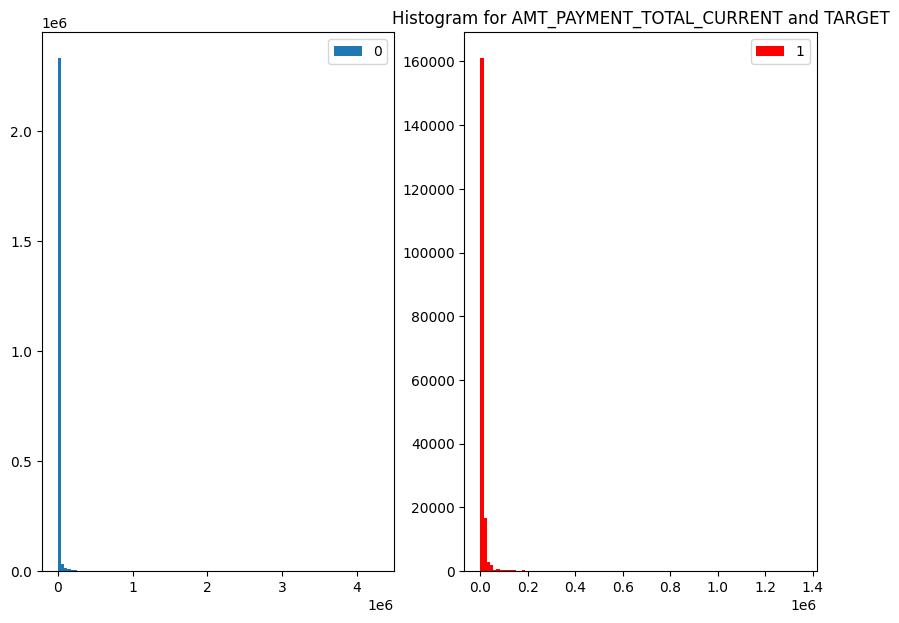

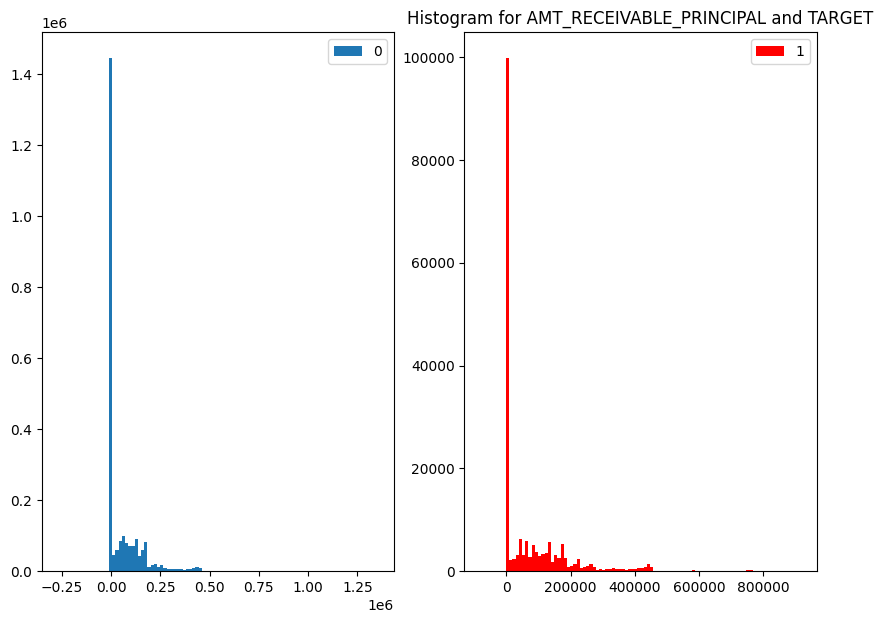

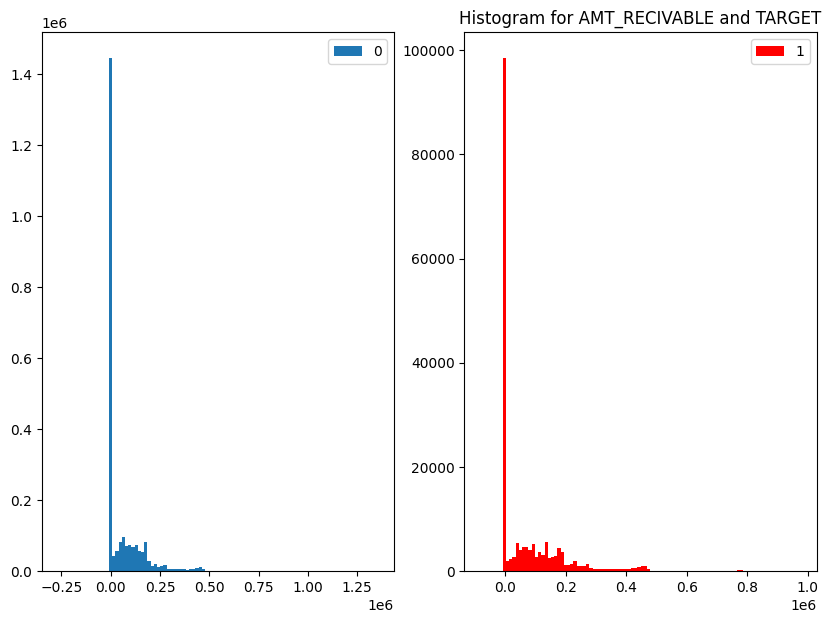

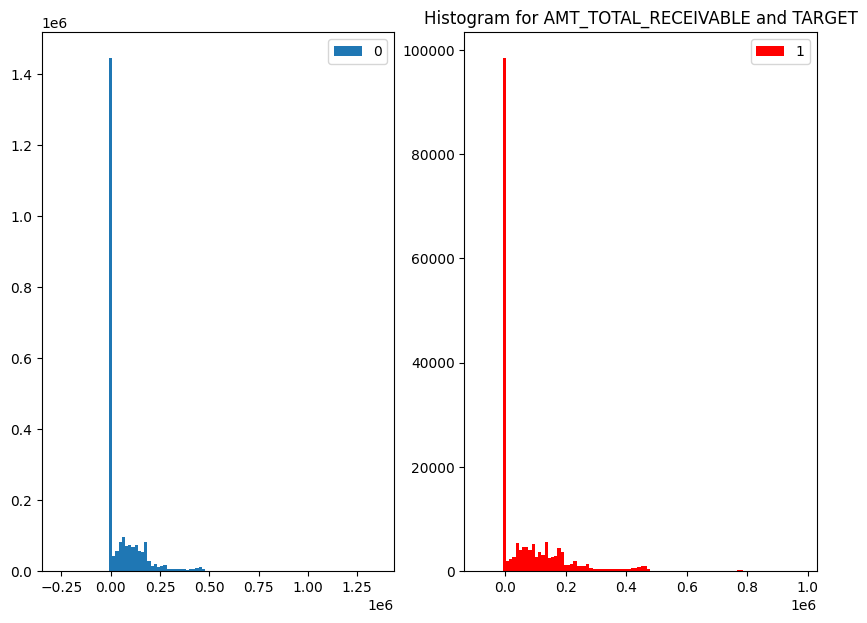

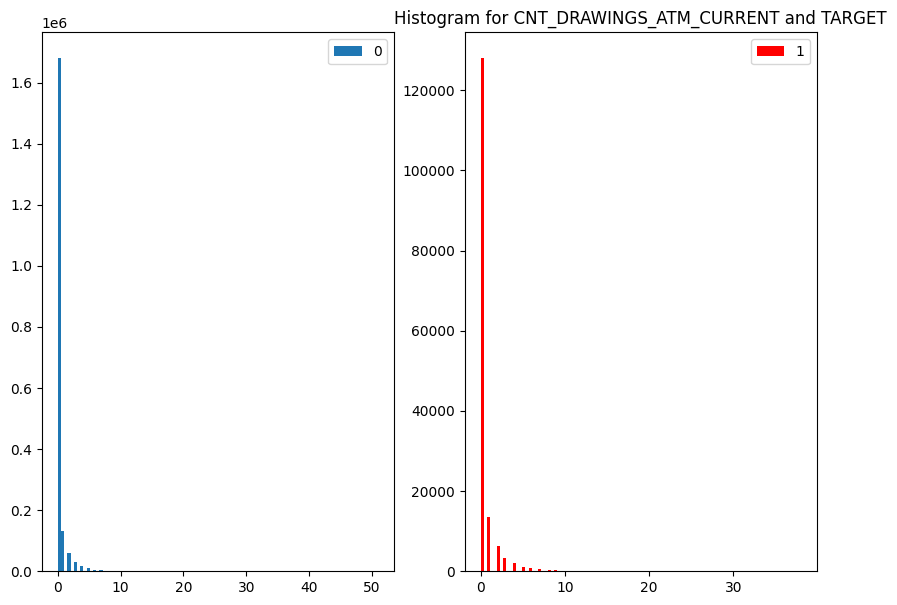

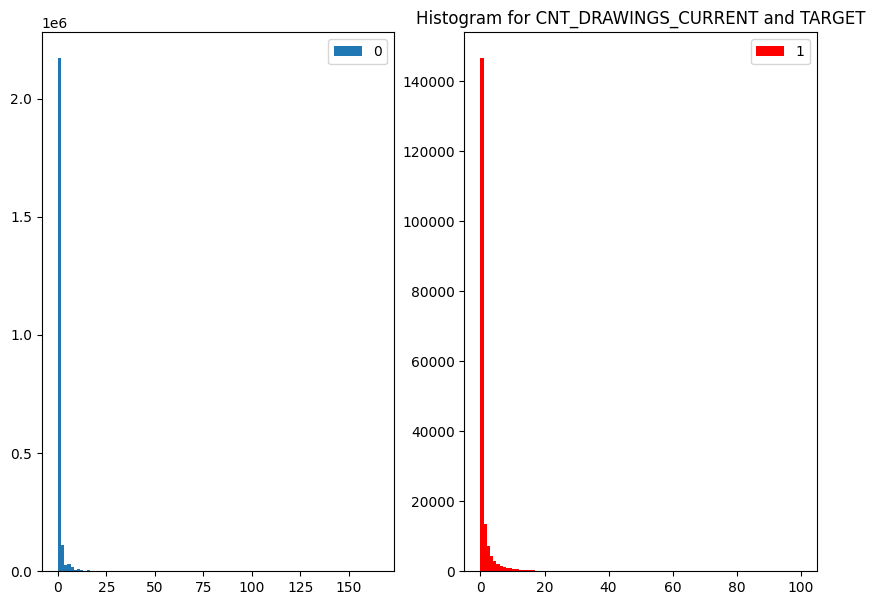

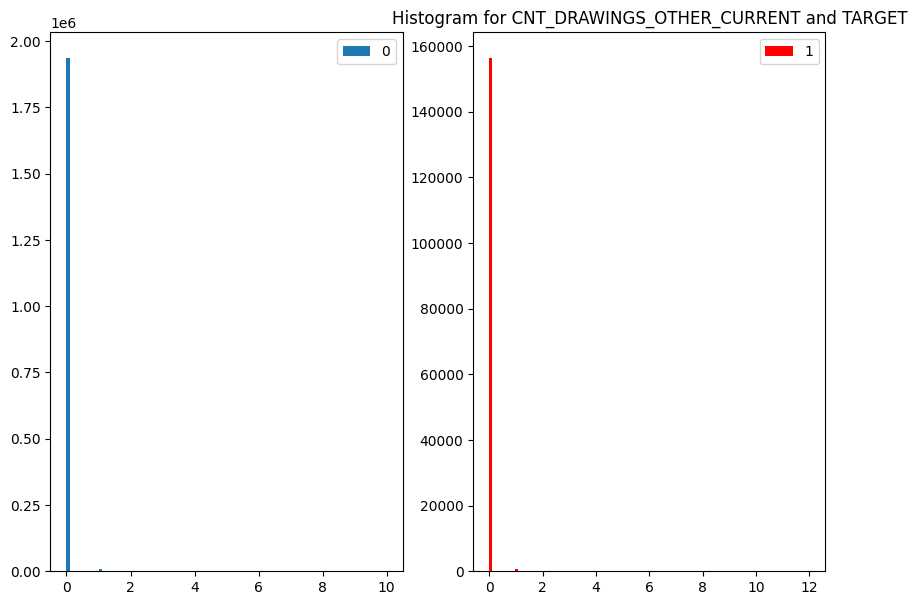

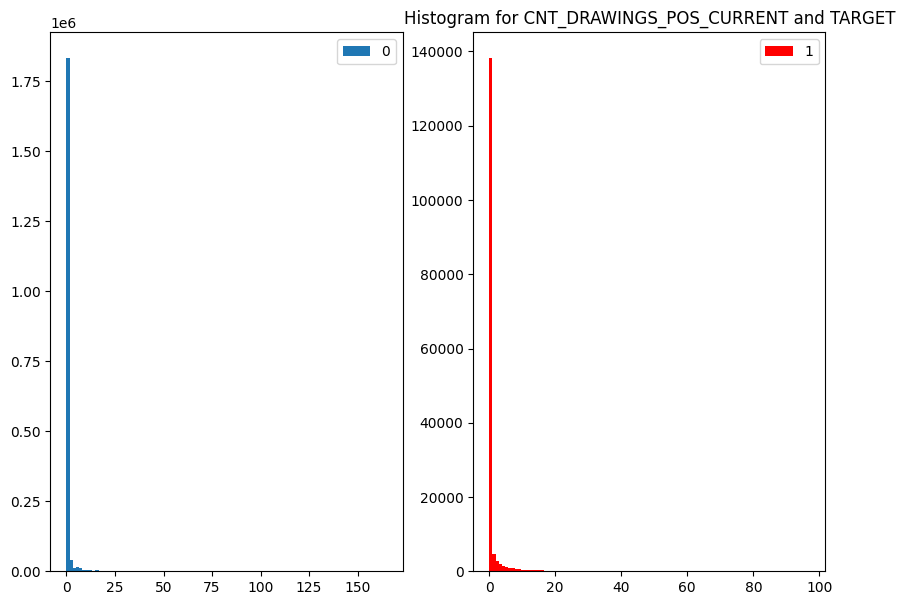

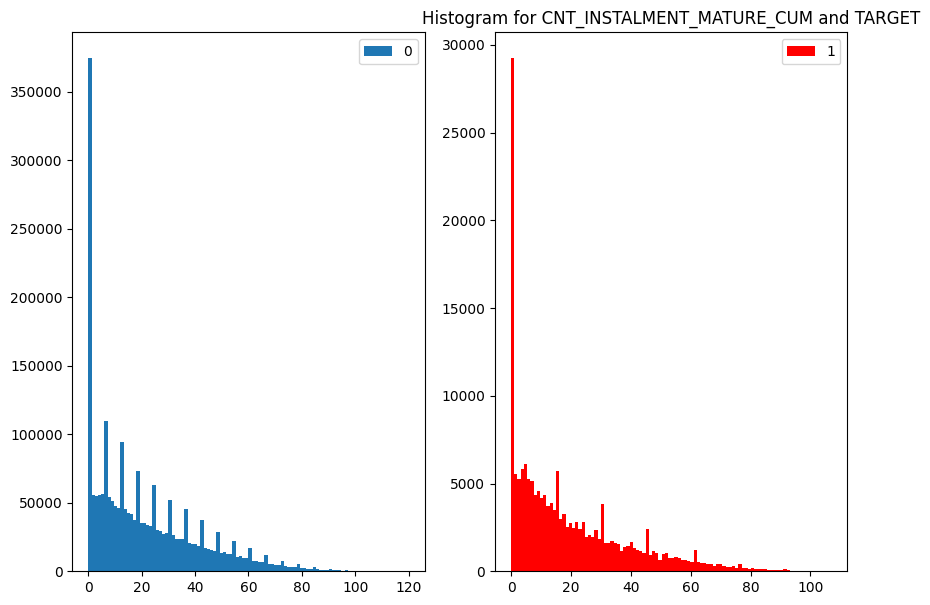

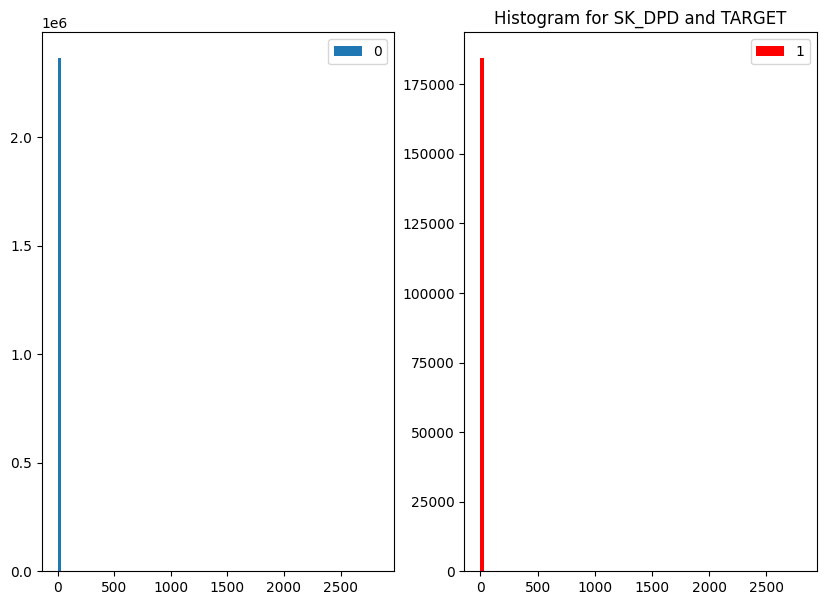

In [17]:

for col in num_data.iloc[:,1:20]:
    fig,ax = plt.subplots(1,2,figsize =(10,7))
    class0 = merge_table[merge_table['TARGET']==0][col]
    class1 = merge_table[merge_table['TARGET']==1][col]
    ax[0].hist(class0,bins = 100,label = 0)
    ax[1].hist(class1,bins = 100,color = 'red',label= 1)
    ax[0].legend()
    ax[1].legend()
    plt.title(f'Histogram for {col} and TARGET')